In [2]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [3]:
#import libraries for reading data, exploring and plotting
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline
# library for train test split
from sklearn.model_selection import train_test_split
# deep learning libraries for text pre-processing
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
# Modeling 
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, Dropout, LSTM, Bidirectional

In [4]:
import pandas as pd
messages = pd.read_csv('C:\\Users\\reddy\\Downloads\\Youtubespamdataset.CSV',encoding="latin1",names=["label", "message"])
messages[:3]

,label,message
0,ham,Yes ... education and behavior and positive t...
1,ham,Education is very important the more you learn...
2,ham,Awesome story I prepared it for my school comp...


In [5]:
print(messages)

    label                                            message
0     ham  Yes ...  education and behavior and positive t...
1     ham  Education is very important the more you learn...
2     ham  Awesome story I prepared it for my school comp...
3    spam                 from where you source your stories
4     ham  Education is the key to acchieve success it's ...
..    ...                                                ...
993  spam                Check out this video on YouTube:¯¨
994  spam                Check out this video on YouTube:¯¨
995  spam  Check out this playlist on YouTube:??<br /><br...
996  spam                Check out this video on YouTube:¯¨
997   ham                      watch this with sound off!¯¨

[998 rows x 2 columns]


In [6]:
messages.describe()

,label,message
count,998,998
unique,2,969
top,ham,Check out this video on YouTube:¯¨
freq,573,19


In [7]:
duplicatedRow = messages[messages.duplicated()]
print(duplicatedRow[:5])

    label                                            message
185   ham  PSY - GANGNAM STYLE (ø?????¡?¬) M/V: htt...
620   ham  Katy Perry - Roar (Official): http://youtu.be/...
699  spam  Hi everyone! Do you like music? Then why not c...
715   ham  Katy Perry - Roar (Official): http://youtu.be/...
717  spam  People, here is a new network like FB...you re...


In [8]:
messages.groupby('label').describe().T

label                                                         ham  \
message count                                                 573   
        unique                                                565   
        top     Katy Perry - Roar (Official): http://youtu.be/...   
        freq                                                    3   

label                                          spam  
message count                                   425  
        unique                                  404  
        top     Check out this video on YouTube:¯¨  
        freq                                     19

In [10]:
# Get all the ham and spam emails
ham_msg = messages[messages.label =='ham']
spam_msg = messages[messages.label=='spam']
# Create numpy list to visualize using wordcloud
ham_msg_text = " ".join(ham_msg.message.to_numpy().tolist())
spam_msg_text = " ".join(spam_msg.message.to_numpy().tolist())

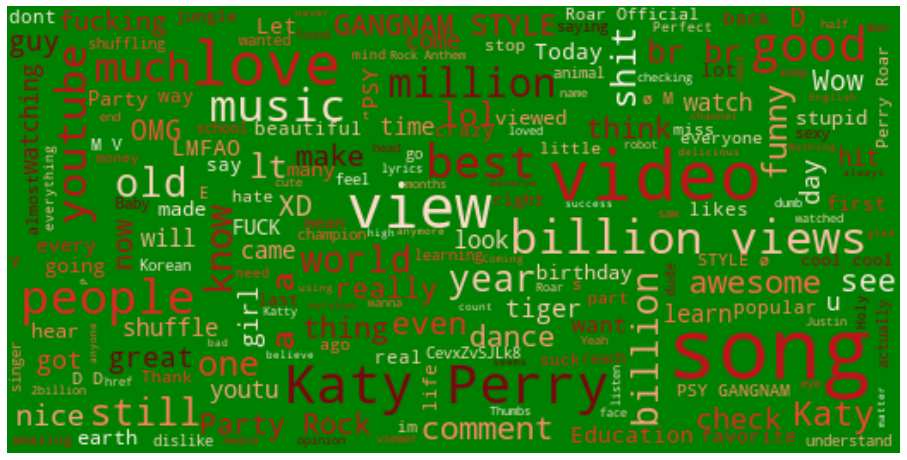

In [11]:
# wordcloud of ham messages
ham_msg_cloud = WordCloud(width =520, height =260, stopwords=STOPWORDS,max_font_size=50, background_color ="Green", colormap='Reds').generate(ham_msg_text)
plt.figure(figsize=(16,10))
plt.imshow(ham_msg_cloud, interpolation='bilinear')
plt.axis('off') # turn off axis
plt.show()

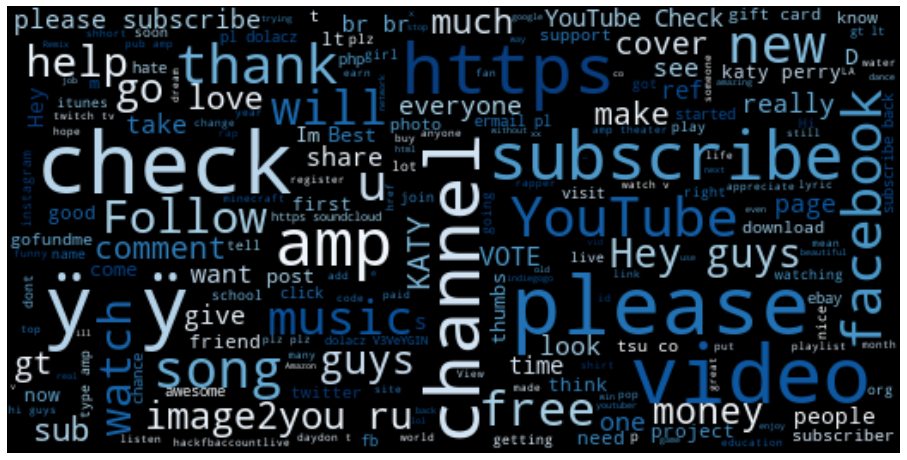

In [12]:
# wordcloud of spam messages
spam_msg_cloud = WordCloud(width =520, height =260, stopwords=STOPWORDS,max_font_size=50, background_color ="black", colormap='Blues').generate(spam_msg_text)
plt.figure(figsize=(16,10))
plt.imshow(spam_msg_cloud, interpolation='bilinear')
plt.axis('off') # turn off axis
plt.show()

C:\Users\reddy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


74.17102966841188

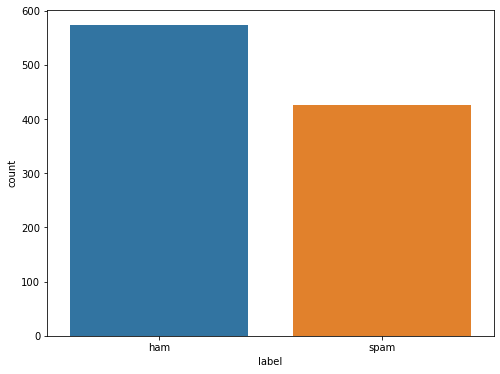

In [13]:
# we can observe imbalance data here 
plt.figure(figsize=(8,6))
sns.countplot(messages.label)
# Percentage of spam messages
(len(spam_msg)/len(ham_msg))*100 # 15.48%

In [14]:
# one way to fix it is to downsample the ham msg
ham_msg_df = ham_msg.sample(n = len(spam_msg), random_state = 44)
spam_msg_df = spam_msg
print(ham_msg_df.shape, spam_msg_df.shape)

(425, 2) (425, 2)


C:\Users\reddy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Message types')

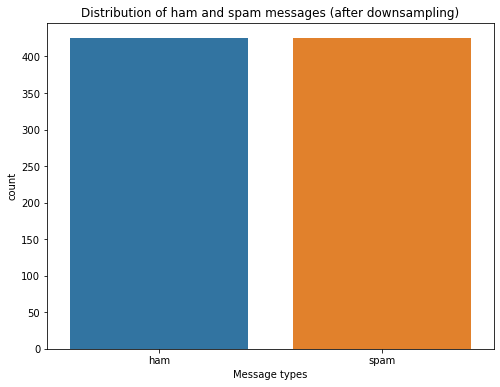

In [15]:
# Create a dataframe with these ham and spam msg
msg_df = ham_msg_df.append(spam_msg_df).reset_index(drop=True)
plt.figure(figsize=(8,6))
sns.countplot(msg_df.label)
plt.title('Distribution of ham and spam messages (after downsampling)')
plt.xlabel('Message types')

In [16]:
# Get length column for each text
msg_df['text_length'] = msg_df['message'].apply(len)
#Calculate average length by label types
labels = msg_df.groupby('label').mean()
labels

,text_length
label,
ham,63.160000
spam,118.181176


In [17]:
 # Map ham label as 0 and spam as 1
msg_df['msg_type']= msg_df['label'].map({'ham': 0, 'spam': 1})
msg_label = msg_df['msg_type'].values
# Split data into train and test
train_msg, test_msg, train_labels, test_labels = train_test_split(msg_df['message'], msg_label, test_size=0.2, random_state=434)

In [18]:
# Defining pre-processing hyperparameters
max_len = 50 
trunc_type = "post" 
padding_type = "post" 
oov_tok = "<OOV>" 
vocab_size = 500

In [19]:
tokenizer = Tokenizer(num_words = vocab_size, char_level=False, oov_token = oov_tok)
tokenizer.fit_on_texts(train_msg)

In [20]:
# Get the word_index 
word_index = tokenizer.word_index
word_index

{'<OOV>': 1,
 '\x8b¯¨': 2,
 'i': 3,
 'the': 4,
 'to': 5,
 'this': 6,
 'and': 7,
 'a': 8,
 'my': 9,
 'you': 10,
 'is': 11,
 'com': 12,
 'it': 13,
 'check': 14,
 'http': 15,
 'out': 16,
 'ÿ': 17,
 'of': 18,
 'on': 19,
 'www': 20,
 'me': 21,
 'video': 22,
 'amp': 23,
 'please': 24,
 'like': 25,
 'in': 26,
 'song': 27,
 'for': 28,
 'so': 29,
 'https': 30,
 'subscribe': 31,
 'if': 32,
 'youtube': 33,
 'channel': 34,
 'katy': 35,
 'love': 36,
 'just': 37,
 'br': 38,
 'that': 39,
 'have': 40,
 'be': 41,
 'views': 42,
 'music': 43,
 '1': 44,
 'your': 45,
 'but': 46,
 'guys': 47,
 'facebook': 48,
 'watch': 49,
 'perry': 50,
 'was': 51,
 '2': 52,
 'ª\x83': 53,
 'up': 54,
 'videos': 55,
 'people': 56,
 'are': 57,
 'good': 58,
 'all': 59,
 'will': 60,
 'get': 61,
 'hey': 62,
 'do': 63,
 'at': 64,
 'lt': 65,
 'can': 66,
 'not': 67,
 'how': 68,
 'with': 69,
 'new': 70,
 'what': 71,
 "i'm": 72,
 'when': 73,
 'help': 74,
 'u': 75,
 'follow': 76,
 'her': 77,
 '39': 78,
 'she': 79,
 'best': 80,
 'very':

In [21]:
# check how many words 
tot_words = len(word_index)
print('There are %s unique tokens in training data. ' % tot_words)

There are 2571 unique tokens in training data. 


In [22]:
# Sequencing and padding on training and testing 
training_sequences = tokenizer.texts_to_sequences(train_msg)
training_padded = pad_sequences (training_sequences, maxlen = max_len, padding = padding_type, truncating = trunc_type )
testing_sequences = tokenizer.texts_to_sequences(test_msg)
testing_padded = pad_sequences(testing_sequences, maxlen = max_len,
padding = padding_type, truncating = trunc_type)

In [23]:
# Shape of train tensor
print('Shape of training tensor: ', training_padded.shape)
print('Shape of testing tensor: ', testing_padded.shape)

Shape of training tensor:  (680, 50)
Shape of testing tensor:  (170, 50)


In [24]:
# Before padding
len(training_sequences[0]), len(training_sequences[1])

(11, 38)

In [25]:
# After padding
len(training_padded[0]), len(training_padded[1])

(50, 50)

In [26]:
print(training_padded[0])

[ 87 437   1   1   1  15 340  12   8 288   1   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]


In [27]:
vocab_size = 500 # As defined earlier
embeding_dim = 16
drop_value = 0.2 # dropout
n_dense = 24

In [28]:
#Dense model architecture
model = Sequential()
model.add(Embedding(vocab_size, embeding_dim, input_length=max_len))
model.add(GlobalAveragePooling1D())
model.add(Dense(24, activation='relu'))
model.add(Dropout(drop_value))
model.add(Dense(1, activation='sigmoid'))

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 16)            8000      
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 8,433
Trainable params: 8,433
Non-trainable params: 0
______________________________________________________

In [30]:
model.compile(loss='binary_crossentropy',optimizer='adam' ,metrics=['accuracy'])

In [31]:
# fitting a dense spam detector model
num_epochs = 30
early_stop = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(training_padded, train_labels, epochs=num_epochs, validation_data=(testing_padded, test_labels),callbacks =[early_stop], verbose=2)

Epoch 1/30
22/22 - 5s - loss: 0.6917 - accuracy: 0.5529 - val_loss: 0.6899 - val_accuracy: 0.5941 - 5s/epoch - 213ms/step
Epoch 2/30
22/22 - 0s - loss: 0.6888 - accuracy: 0.5868 - val_loss: 0.6869 - val_accuracy: 0.6176 - 71ms/epoch - 3ms/step
Epoch 3/30
22/22 - 0s - loss: 0.6841 - accuracy: 0.6074 - val_loss: 0.6821 - val_accuracy: 0.6235 - 72ms/epoch - 3ms/step
Epoch 4/30
22/22 - 0s - loss: 0.6777 - accuracy: 0.6397 - val_loss: 0.6744 - val_accuracy: 0.6529 - 81ms/epoch - 4ms/step
Epoch 5/30
22/22 - 0s - loss: 0.6693 - accuracy: 0.6676 - val_loss: 0.6654 - val_accuracy: 0.6471 - 82ms/epoch - 4ms/step
Epoch 6/30
22/22 - 0s - loss: 0.6574 - accuracy: 0.6926 - val_loss: 0.6517 - val_accuracy: 0.6765 - 73ms/epoch - 3ms/step
Epoch 7/30
22/22 - 0s - loss: 0.6439 - accuracy: 0.7029 - val_loss: 0.6347 - val_accuracy: 0.6706 - 57ms/epoch - 3ms/step
Epoch 8/30
22/22 - 0s - loss: 0.6246 - accuracy: 0.7265 - val_loss: 0.6116 - val_accuracy: 0.7529 - 73ms/epoch - 3ms/step
Epoch 9/30
22/22 - 0s - 

In [32]:
# Read as a dataframe 
metrics = pd.DataFrame(history.history)
# Rename column
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy', 'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])

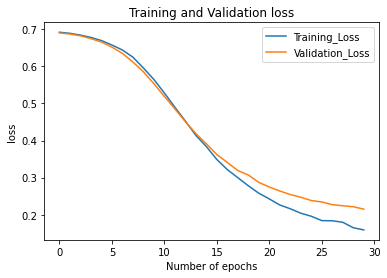

In [33]:
plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')

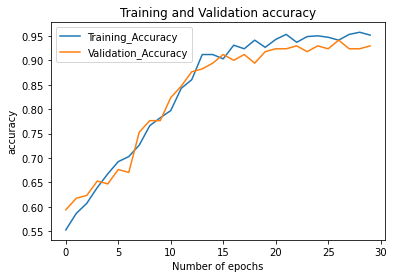

In [34]:
plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

In [35]:
# display long string 
pd.options.display.max_colwidth=100
messages[:3]

,label,message
0,ham,Yes ... education and behavior and positive thinking are very important thing that we should fo...
1,ham,Education is very important the more you learn it the more you feel you need to learn more..
2,ham,Awesome story I prepared it for my school competition


In [37]:
predict_msg = ["Great video! As an established data scientist myself, this is definitely an accurate data science project lifecycle"]

In [38]:
# Defining prediction function
def predict_spam(predict_msg):
    new_seq = tokenizer.texts_to_sequences(predict_msg)
    padded = pad_sequences(new_seq, maxlen =max_len,
                      padding = padding_type,
                      truncating=trunc_type)
    return (model.predict(padded))
predict_spam(predict_msg)

array([[0.44217542]], dtype=float32)

In [39]:
# The third one gives 0.99 indicating very high probabilty of spam
predict_msg = ["Education is a credit that you'll later owe to society"]
predict_spam(predict_msg)

array([[0.35964304]], dtype=float32)